
# Multi-Panel Plot of 1-Degree Precipitation Datasets


Use the Xarray module to read in daily 1-degree precip data from Brian Mapes' dataset archive at: 
http://weather.rsmas.miami.edu/repository/entry/show?entryid=synth%3Ad68cf65c-8cdd-4886-a61f-d03e877fea67%3AL2FnZ3JlZ2F0aW9ucy9kYWlseQ%3D%3D&ascending=true&orderby=name&showentryselectform=true

The following code opens all of the datasets via OPeNDAP, allows for the user to slice a time and lat-lon box to fit a desired case study, computes the precipitation per day, and constructs a multi-panel plot with all of the results in one figure. It is all hard-wired (more for back-checking and making sure everything is correctly in place) so for the moment, manual changes to the bounding boxes and times are required (time consuming, but proven to work). Hopefully future versions of this code will allow for some for loops to take care of the long-winded, hard-wired code below. 

----- 
#### Import all of our needed modules



In [26]:
%matplotlib inline

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from matplotlib import cm
import matplotlib.gridspec as gridspec
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap, addcyclic
import cartopy.crs as ccrs

In [3]:
gldas = xr.open_dataset('http://weather.rsmas.miami.edu/repository/opendap/synth:d68cf65c-8cdd-4886-a61f-d03e877fea67:L2FnZ3JlZ2F0aW9ucy9kYWlseS9wcmVjaXAuZ2xkYXMuZGFpbHlfYWdnLm5jbWw=/entry.das', decode_times=True)
cpcu = xr.open_dataset('http://weather.rsmas.miami.edu/repository/opendap/synth:d68cf65c-8cdd-4886-a61f-d03e877fea67:L2FnZ3JlZ2F0aW9ucy9kYWlseS9wcmVjaXAuY3BjdS5kYWlseV9hZ2cubmNtbA==/entry.das', decode_times=True)
chirps = xr.open_dataset('http://weather.rsmas.miami.edu/repository/opendap/synth:d68cf65c-8cdd-4886-a61f-d03e877fea67:L2FnZ3JlZ2F0aW9ucy9kYWlseS9wcmVjaXAuY2hpcnBzLmRhaWx5X2FnZy5uY21s/entry.das', decode_times=True)
ens_mean = xr.open_dataset('http://weather.rsmas.miami.edu/repository/opendap/synth:d68cf65c-8cdd-4886-a61f-d03e877fea67:L2FnZ3JlZ2F0aW9ucy9kYWlseS9wcmVjaXAuZW5zbWVhbi5kYWlseV9hZ2cubmNtbA==/entry.das', decode_times=True)
ens_rms = xr.open_dataset('http://weather.rsmas.miami.edu/repository/opendap/synth:d68cf65c-8cdd-4886-a61f-d03e877fea67:L2FnZ3JlZ2F0aW9ucy9kYWlseS9wcmVjaXAuZW5zcm1zLmRhaWx5X2FnZy5uY21s/entry.das', decode_times=True)
trmm3b42 = xr.open_dataset('http://weather.rsmas.miami.edu/repository/opendap/synth:d68cf65c-8cdd-4886-a61f-d03e877fea67:L2FnZ3JlZ2F0aW9ucy9kYWlseS9wcmVjaXAudHJtbTNiNDIuZGFpbHlfYWdnLm5jbWw=/entry.das', decode_times=True)
persiann = xr.open_dataset('http://weather.rsmas.miami.edu/repository/opendap/synth:d68cf65c-8cdd-4886-a61f-d03e877fea67:L2FnZ3JlZ2F0aW9ucy9kYWlseS9wcmVjaXAucGVyc2lhbm4uZGFpbHlfYWdnLm5jbWw=/entry.das', decode_times=True)
mswep = xr.open_dataset('http://weather.rsmas.miami.edu/repository/opendap/synth:d68cf65c-8cdd-4886-a61f-d03e877fea67:L2FnZ3JlZ2F0aW9ucy9kYWlseS9wcmVjaXAubXN3ZXAuZGFpbHlfYWdnLm5jbWw=/entry.das', decode_times=True)
merrav2 = xr.open_dataset('http://weather.rsmas.miami.edu/repository/opendap/synth:d68cf65c-8cdd-4886-a61f-d03e877fea67:L2FnZ3JlZ2F0aW9ucy9kYWlseS9wcmVjaXAubWVycmEyLmRhaWx5X2FnZy5uY21s/entry.das', decode_times=True)
merra = xr.open_dataset('http://weather.rsmas.miami.edu/repository/opendap/synth:d68cf65c-8cdd-4886-a61f-d03e877fea67:L2FnZ3JlZ2F0aW9ucy9kYWlseS9wcmVjaXAubWVycmEuZGFpbHlfYWdnLm5jbWw=/entry.das', decode_times=True)
jra55 = xr.open_dataset('http://weather.rsmas.miami.edu/repository/opendap/synth:d68cf65c-8cdd-4886-a61f-d03e877fea67:L2FnZ3JlZ2F0aW9ucy9kYWlseS9wcmVjaXAuanJhNTUuZGFpbHlfYWdnLm5jbWw=/entry.das', decode_times=True)
gsmaprnl = xr.open_dataset('http://weather.rsmas.miami.edu/repository/opendap/synth:d68cf65c-8cdd-4886-a61f-d03e877fea67:L2FnZ3JlZ2F0aW9ucy9kYWlseS9wcmVjaXAuZ3NtYXBybmwuZGFpbHlfYWdnLm5jbWw=/entry.das', decode_times=True)
gpcp1dd = xr.open_dataset('http://weather.rsmas.miami.edu/repository/opendap/synth:d68cf65c-8cdd-4886-a61f-d03e877fea67:L2FnZ3JlZ2F0aW9ucy9kYWlseS9wcmVjaXAuZ3BjcDFkZC5kYWlseV9hZ2cubmNtbA==/entry.das', decode_times=True)
ecint = xr.open_dataset('http://weather.rsmas.miami.edu/repository/opendap/synth:d68cf65c-8cdd-4886-a61f-d03e877fea67:L2FnZ3JlZ2F0aW9ucy9kYWlseS9wcmVjaXAuZWNpbnQuZGFpbHlfYWdnLm5jbWw=/entry.das', decode_times=True)
cmorph = xr.open_dataset('http://weather.rsmas.miami.edu/repository/opendap/synth:d68cf65c-8cdd-4886-a61f-d03e877fea67:L2FnZ3JlZ2F0aW9ucy9kYWlseS9wcmVjaXAuY21vcnBoLmRhaWx5X2FnZy5uY21s/entry.das', decode_times=True)
cfsr = xr.open_dataset('http://weather.rsmas.miami.edu/repository/opendap/synth:d68cf65c-8cdd-4886-a61f-d03e877fea67:L2FnZ3JlZ2F0aW9ucy9kYWlseS9wcmVjaXAuY2Zzci5kYWlseV9hZ2cubmNtbA==/entry.das', decode_times=True)

#### Specify the parameters for date and time below:

In [28]:
case_date= '2005-10-24'
south= 20.
north= 30.
west= 275.        #of 360 deg
east= 285.        #of 360 deg

#### This cell is where we do the calculations for all of our datasets:

What I've done here is pre-selected an example case involving Hurricane Wilma's landfall in 2005. This is why the time and lat-lon slices are prescribed as follows. Of course, these parameters can be adjusted on a case-by-case basis. Once the time and lat-lon slices are selected, each dataset's precipitation variable is simply converted into mm/day from its native unit of kg m2 s-1.

In [29]:
#Ensemble Mean
ens_mean_event= ens_mean.precip.sel(time=case_date,lat=slice(south, north),lon=slice(west, east))
ens_mean_pcp= ens_mean_event * 86400 # Convert to mm/day

#Ensemble Root Mean Square (RMS)`
ens_rms_event= ens_rms.precip.sel(time=case_date,lat=slice(south, north),lon=slice(west, east))
ens_rms_pcp= ens_rms_event * 86400 # Convert to mm/day

#GLDAS
gldas_event= gldas.precip.sel(time=case_date,lat=slice(south, north),lon=slice(west, east))
gldas_pcp= gldas_event * 86400 # Convert to mm/day

#CPCU
cpcu_event= cpcu.precip.sel(time=case_date,lat=slice(south, north),lon=slice(west, east))
cpcu_pcp= cpcu_event * 86400 # Convert to mm/day

#CHIRPS
chirps_event= chirps.precip.sel(time=case_date,lat=slice(south, north),lon=slice(west, east))
chirps_pcp= chirps_event * 86400 # Convert to mm/day

#TRMM 3B42
trmm3b42_event= trmm3b42.precip.sel(time=case_date,lat=slice(south, north),lon=slice(west, east))
trmm3b42_pcp= trmm3b42_event * 86400 # Convert to mm/day

#PERSIANN
persiann_event= persiann.precip.sel(time=case_date,lat=slice(south, north),lon=slice(west, east))
persiann_pcp= persiann_event * 86400 # Convert to mm/day

#MSWEP
mswep_event= mswep.precip.sel(time=case_date,lat=slice(south, north),lon=slice(west, east))
mswep_pcp= mswep_event * 86400 # Convert to mm/day

#MERRA
merra_event= merra.precip.sel(time=case_date,lat=slice(south, north),lon=slice(west, east))
merra_pcp= merra_event * 86400 # Convert to mm/day

#MERRA-2
merrav2_event= merrav2.precip.sel(time=case_date,lat=slice(south, north),lon=slice(west, east))
merrav2_pcp= merrav2_event * 86400 # Convert to mm/day

#JRA55
jra55_event= jra55.precip.sel(time=case_date,lat=slice(south, north),lon=slice(west, east))
jra55_pcp= jra55_event * 86400 # Convert to mm/day

#GSMAPRNL
gsmaprnl_event= gsmaprnl.precip.sel(time=case_date,lat=slice(south, north),lon=slice(west, east))
gsmaprnl_pcp= gsmaprnl_event * 86400 # Convert to mm/day

#GPCP1DD
gpcp1dd_event= gpcp1dd.precip.sel(time=case_date,lat=slice(south, north),lon=slice(west, east))
gpcp1dd_pcp= gpcp1dd_event * 86400 # Convert to mm/day

#ECINT
ecint_event= ecint.precip.sel(time=case_date,lat=slice(south, north),lon=slice(west, east))
ecint_pcp= ecint_event * 86400 # Convert to mm/day

#CMORPH
cmorph_event= cmorph.precip.sel(time=case_date,lat=slice(south, north),lon=slice(west, east))
cmorph_pcp= cmorph_event * 86400 # Convert to mm/day

#CFSR
cfsr_event= cfsr.precip.sel(time=case_date,lat=slice(south, north),lon=slice(west, east))
cfsr_pcp= cfsr_event * 86400 # Convert to mm/day

#### So now that we have performed the calculations, we are ready to make a 4x4 plot for all available datasets in the catalogue.

First, we must define our plot background. The following cell has some basic bounding definitions and normalizations that will make the plot easier to visualize as well as helping to keep values uniform from one plot to another.

In [15]:
def plot_background(ax):
    ax.set_extent([west, east, south, north]) #Extent based on lat-lon slice above. Modify accordingly.
    ax.coastlines('50m', edgecolor='black', linewidth=0.5)
    return ax

crs = ccrs.LambertConformal(central_longitude=((lon_high+lon_low)/2), central_latitude=(lat_high+lat_low)/2)

#Change the range of the lat-lon based on the data slice prescribed above.

lon_2d= np.arange(west, east)
lat_2d= np.arange(south, north) 

#Set bounds for colorbar
bounds_pcp= np.arange(0,200,10) #In this example, but can be modified based on the global maxima of all datasets.
norm = mpl.colors.BoundaryNorm(boundaries=bounds_pcp, ncolors=256)

This long cell has everything hard-wired into the figure development... 16 datasets, 16 axes, and a 4x4 panel configuration using matplotlib, gridspec, and cartopy. Each dataset is prescribed to one axis and is labeled in a comment above the code pertaining to each respective dataset. For instance, ax1 is for the ensemble mean, ax2 for the RMS, and so on. 

The following code is adapted from the MetPy cookbook on Unidata's website: https://unidata.github.io/MetPy/latest/

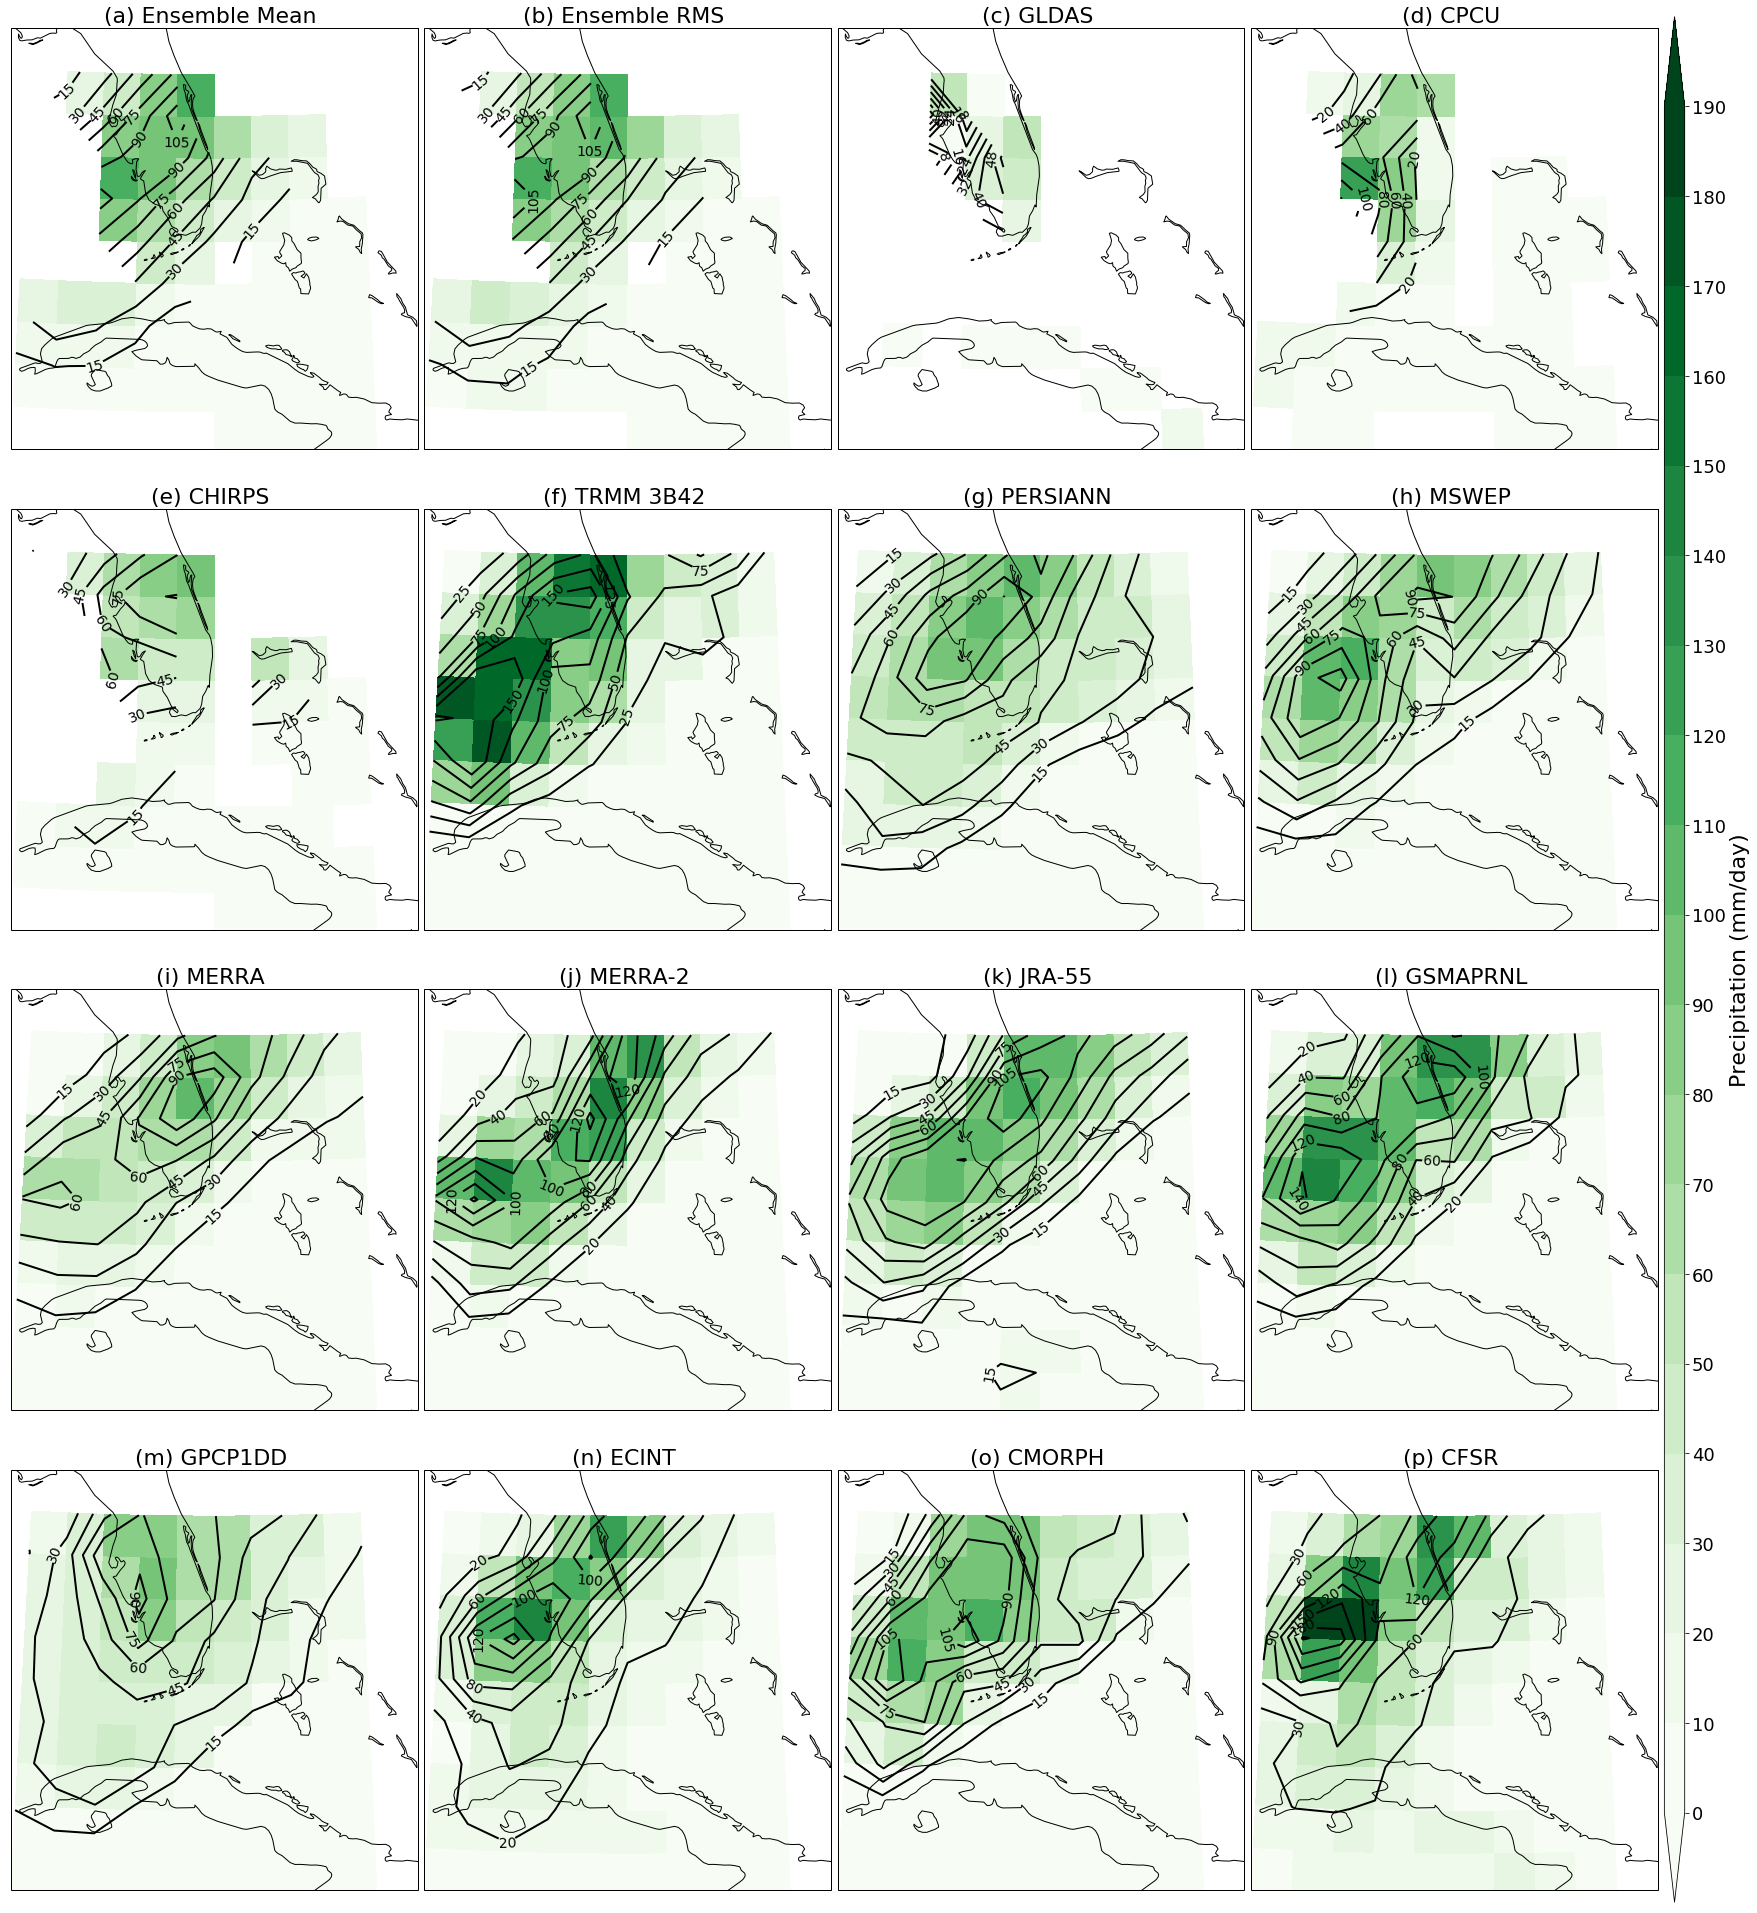

In [16]:
# Create the figure based on the MetPy Examples
fig = plt.figure(figsize=(30, 30))
gs = gridspec.GridSpec(5, 5, height_ratios=[1, 1, 1, 1, 0.05], width_ratios=[1,1,1,1,0.05], bottom=.05, top=.95, wspace=0.02, hspace=0.1)

# Plot 1- Ensemble Mean
ax1 = plt.subplot(gs[0, 0], projection=crs)
plot_background(ax1)
cf1 = ax1.pcolormesh(lon_2d, lat_2d, ens_mean_pcp, cmap='Greens', transform=ccrs.PlateCarree(), norm=norm)
c1 = ax1.contour(lon_2d, lat_2d, ens_mean_pcp, colors='black', linewidths=2,
                 transform=ccrs.PlateCarree())
plt.clabel(c1, fontsize=14, inline=1, inline_spacing=1, fmt='%i', rightside_up=True)
ax1.set_title('(a) Ensemble Mean ', fontsize=22)

# Plot 2- Ensemble Root Mean Square

ax2 = plt.subplot(gs[0, 1], projection=crs)
plot_background(ax2)
cf2 = ax2.pcolormesh(lon_2d, lat_2d, ens_rms_pcp, cmap='Greens', transform=ccrs.PlateCarree(), norm=norm)
c2 = ax2.contour(lon_2d, lat_2d, ens_rms_pcp, colors='black', linewidths=2,
                 transform=ccrs.PlateCarree())
plt.clabel(c2, fontsize=14, inline=1, inline_spacing=1, fmt='%i', rightside_up=True)
ax2.set_title('(b) Ensemble RMS ', fontsize=22)

# Plot 3- GLDAS
ax3 = plt.subplot(gs[0, 2], projection=crs)
plot_background(ax3)
cf3 = ax3.pcolormesh(lon_2d, lat_2d, gldas_pcp, cmap='Greens', transform=ccrs.PlateCarree(), norm=norm)
c3 = ax3.contour(lon_2d, lat_2d, gldas_pcp, colors='black', linewidths=2,
                 transform=ccrs.PlateCarree())
plt.clabel(c3, fontsize=14, inline=1, inline_spacing=1, fmt='%i', rightside_up=True)
ax3.set_title('(c) GLDAS ', fontsize=22)

# Plot 4- CPCU
ax4 = plt.subplot(gs[0, 3], projection=crs)
plot_background(ax4)
cf4 = ax4.pcolormesh(lon_2d, lat_2d, cpcu_pcp, cmap='Greens', transform=ccrs.PlateCarree(), norm=norm)
c4 = ax4.contour(lon_2d, lat_2d, cpcu_pcp, colors='black', linewidths=2,
                 transform=ccrs.PlateCarree())
plt.clabel(c4, fontsize=14, inline=1, inline_spacing=1, fmt='%i', rightside_up=True)
ax4.set_title('(d) CPCU ', fontsize=22)

# Plot 5- CHIRPS
ax5 = plt.subplot(gs[1, 0], projection=crs)
plot_background(ax5)
cf5 = ax5.pcolormesh(lon_2d, lat_2d, chirps_pcp, cmap='Greens', transform=ccrs.PlateCarree(), norm=norm)
c5 = ax5.contour(lon_2d, lat_2d, chirps_pcp, colors='black', linewidths=2,
                 transform=ccrs.PlateCarree())
plt.clabel(c5, fontsize=14, inline=1, inline_spacing=1, fmt='%i', rightside_up=True)
ax5.set_title('(e) CHIRPS ', fontsize=22)

# Plot 6- TRMM 3B42
ax6 = plt.subplot(gs[1, 1], projection=crs)
plot_background(ax6)
cf6 = ax6.pcolormesh(lon_2d, lat_2d, trmm3b42_pcp, cmap='Greens', transform=ccrs.PlateCarree(), norm=norm)
c6 = ax6.contour(lon_2d, lat_2d, trmm3b42_pcp, colors='black', linewidths=2,
                 transform=ccrs.PlateCarree())
plt.clabel(c6, fontsize=14, inline=1, inline_spacing=1, fmt='%i', rightside_up=True)
ax6.set_title('(f) TRMM 3B42 ', fontsize=22)

# Plot 7- PERSIANN
ax7 = plt.subplot(gs[1, 2], projection=crs)
plot_background(ax7)
cf7 = ax7.pcolormesh(lon_2d, lat_2d, persiann_pcp, cmap='Greens', transform=ccrs.PlateCarree(), norm=norm)
c7 = ax7.contour(lon_2d, lat_2d, persiann_pcp, colors='black', linewidths=2,
                 transform=ccrs.PlateCarree())
plt.clabel(c7, fontsize=14, inline=1, inline_spacing=1, fmt='%i', rightside_up=True)
ax7.set_title('(g) PERSIANN ', fontsize=22)

# Plot 8- MSWEP
ax8 = plt.subplot(gs[1, 3], projection=crs)
plot_background(ax8)
cf8 = ax8.pcolormesh(lon_2d, lat_2d, mswep_pcp, cmap='Greens', transform=ccrs.PlateCarree(), norm=norm)
c8 = ax8.contour(lon_2d, lat_2d, mswep_pcp, colors='black', linewidths=2,
                 transform=ccrs.PlateCarree())
plt.clabel(c8, fontsize=14, inline=1, inline_spacing=1, fmt='%i', rightside_up=True)
ax8.set_title('(h) MSWEP ', fontsize=22)

# Plot 9- MERRA
ax9 = plt.subplot(gs[2, 0], projection=crs)
plot_background(ax9)
cf9 = ax9.pcolormesh(lon_2d, lat_2d, merra_pcp, cmap='Greens', transform=ccrs.PlateCarree(), norm=norm)
c9 = ax9.contour(lon_2d, lat_2d, merra_pcp, colors='black', linewidths=2,
                 transform=ccrs.PlateCarree())
plt.clabel(c9, fontsize=14, inline=1, inline_spacing=1, fmt='%i', rightside_up=True)
ax9.set_title('(i) MERRA ', fontsize=22)

# Plot 10- MERRA-2
ax10 = plt.subplot(gs[2, 1], projection=crs)
plot_background(ax10)
cf10 = ax10.pcolormesh(lon_2d, lat_2d, merrav2_pcp, cmap='Greens', transform=ccrs.PlateCarree(), norm=norm)
c10 = ax10.contour(lon_2d, lat_2d, merrav2_pcp, colors='black', linewidths=2,
                 transform=ccrs.PlateCarree())
plt.clabel(c10, fontsize=14, inline=1, inline_spacing=1, fmt='%i', rightside_up=True)
ax10.set_title('(j) MERRA-2 ', fontsize=22)

# Plot 11- JRA-55
ax11 = plt.subplot(gs[2, 2], projection=crs)
plot_background(ax11)
cf11 = ax11.pcolormesh(lon_2d, lat_2d, jra55_pcp, cmap='Greens', transform=ccrs.PlateCarree(), norm=norm)
c11 = ax11.contour(lon_2d, lat_2d, jra55_pcp, colors='black', linewidths=2,
                 transform=ccrs.PlateCarree())
plt.clabel(c11, fontsize=14, inline=1, inline_spacing=1, fmt='%i', rightside_up=True)
ax11.set_title('(k) JRA-55 ', fontsize=22)

# Plot 12- GSMAPRNL
ax12 = plt.subplot(gs[2, 3], projection=crs)
plot_background(ax12)
cf12 = ax12.pcolormesh(lon_2d, lat_2d, gsmaprnl_pcp, cmap='Greens', transform=ccrs.PlateCarree(), norm=norm)
c12 = ax12.contour(lon_2d, lat_2d, gsmaprnl_pcp, colors='black', linewidths=2,
                 transform=ccrs.PlateCarree())
plt.clabel(c12, fontsize=14, inline=1, inline_spacing=1, fmt='%i', rightside_up=True)
ax12.set_title('(l) GSMAPRNL ', fontsize=22)

# Plot 13- GPCP1DD
ax13 = plt.subplot(gs[3, 0], projection=crs)
plot_background(ax13)
cf13 = ax13.pcolormesh(lon_2d, lat_2d, gpcp1dd_pcp, cmap='Greens', transform=ccrs.PlateCarree(), norm=norm)
c13 = ax13.contour(lon_2d, lat_2d, gpcp1dd_pcp, colors='black', linewidths=2,
                 transform=ccrs.PlateCarree())
plt.clabel(c13, fontsize=14, inline=1, inline_spacing=1, fmt='%i', rightside_up=True)
ax13.set_title('(m) GPCP1DD ', fontsize=22)

# Plot 14- ECINT
ax14 = plt.subplot(gs[3, 1], projection=crs)
plot_background(ax14)
cf14 = ax14.pcolormesh(lon_2d, lat_2d, ecint_pcp, cmap='Greens', transform=ccrs.PlateCarree(), norm=norm)
c14 = ax14.contour(lon_2d, lat_2d, ecint_pcp, colors='black', linewidths=2,
                 transform=ccrs.PlateCarree())
plt.clabel(c14, fontsize=14, inline=1, inline_spacing=1, fmt='%i', rightside_up=True)
ax14.set_title('(n) ECINT ', fontsize=22)

# Plot 15- ECINT
ax15 = plt.subplot(gs[3, 2], projection=crs)
plot_background(ax15)
cf15 = ax15.pcolormesh(lon_2d, lat_2d, cmorph_pcp, cmap='Greens', transform=ccrs.PlateCarree(), norm=norm)
c15 = ax15.contour(lon_2d, lat_2d, cmorph_pcp, colors='black', linewidths=2,
                 transform=ccrs.PlateCarree())
plt.clabel(c15, fontsize=14, inline=1, inline_spacing=1, fmt='%i', rightside_up=True)
ax15.set_title('(o) CMORPH ', fontsize=22)

# Plot 16- CFSR
ax16 = plt.subplot(gs[3, 3], projection=crs)
plot_background(ax16)
cf16 = ax16.pcolormesh(lon_2d, lat_2d, cfsr_pcp, cmap='Greens', transform=ccrs.PlateCarree(), norm=norm)
c16 = ax16.contour(lon_2d, lat_2d, cfsr_pcp, colors='black', linewidths=2,
                 transform=ccrs.PlateCarree())
plt.clabel(c16, fontsize=14, inline=1, inline_spacing=1, fmt='%i', rightside_up=True)
ax16.set_title('(p) CFSR ', fontsize=22)

ax17= plt.subplot(gs[:-1, 4])
cb = mpl.colorbar.ColorbarBase(ax17, cmap='Greens',
                                norm=norm,
                                extend='both',
                                extendfrac='auto',
                                ticks=bounds_pcp,
                                spacing='uniform',
                                orientation='vertical')

font_size_cb = 18 # Adjust as appropriate.
cb.ax.tick_params(labelsize=font_size_cb)

cb.set_label('Precipitation (mm/day)', fontsize=22)

plt.savefig('../Precipitation_multiplot.png', bbox_inches='tight')

plt.show()
